In [2]:
%matplotlib notebook
import matplotlib
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate,fftpack
import csv

In [80]:
header = pd.read_csv('../datasets/slipperData/Alice.csv', nrows=1, header=None)
header = header.values[0]

In [81]:
#alice = pd.read_csv('Project/slipperData/Alice.csv', nrows=5000,skiprows=400,names=header)
alice = pd.read_csv('../datasets/slipperData/Alice.csv', skiprows=1, names=header)

[array([ 0.112549,  0.111816,  0.110596, ...,  0.080566,  0.079346,
        0.081787]), array([ 0.181885,  0.182373,  0.180908, ...,  0.196289,  0.193848,
        0.193115]), array([ 0.857666,  0.864014,  0.859131, ...,  0.856445,  0.857666,
        0.857178])]


<IPython.core.display.Javascript object>


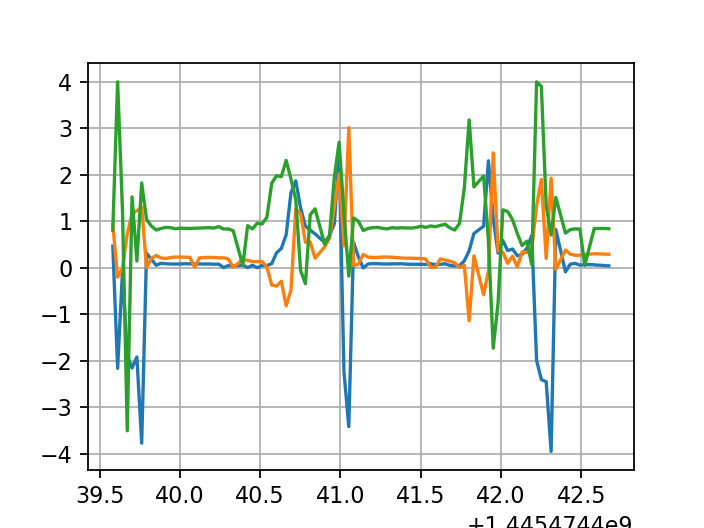

In [123]:
ts = alice['Timestamp'].values
ts_orig = ts - min(ts)
axis = [alice['Axis' + str(i+1)].values for i in range(3)]
print(axis)

class TimeSample:
    t = 0.0
    y = 0.0
    peak = False
    valley = False
    def __init__(self, t, y):
        self.t  = t
        self.y = y
        
class TimeSeries:
    y = []
    ts = []
    ys = []
    def __init__(self, ts, ys):
        self.ts = ts
        self.ys = ys
        self.convertRaw()
        
    def zeroMean(self):
        self.ys = self.ys - np.mean(self.ys)
        self.convertRaw()
        
    def convertRaw(self):
        self.y = []
        for i in range(len(self.ts)):
            self.y.append(TimeSample(self.ts[i], self.ys[i]))  
            
    def lpfMA(self, filterLen):
        win = np.ones(filterLen)
        ys_lpf = signal.convolve(self.ys, win, mode='same') / filter_length 
        self.ys = ys_lpf
        self.convertRaw()

    def labelPeakValley(self):
        search_order = 5
        peaks_idx = np.array(signal.argrelmax(self.ys, order=search_order))
        valleys_idx = np.array(signal.argrelmin(self.ys, order=search_order))

        peaks_t = ts_new[peaks_idx]
        valleys_t = ts_new[valleys_idx]
        peaks = axis_lpf[0][peaks_idx]
        valleys = axis_lpf[0][valleys_idx]

        peaks_filt = np.nonzero(np.logical_and(peaks > 0.2, peaks < 4))
        valleys_filt = np.nonzero(np.logical_and(valleys < -0.2, valleys > -4))

        peaks_idx = peaks_idx[peaks_filt]
        valleys_idx = valleys_idx[valleys_filt]
        peaks_t = ts_new[peaks_idx]
        valleys_t = ts_new[valleys_idx]
        peaks = axis_lpf[0][peaks_idx]
        valleys = axis_lpf[0][valleys_idx]

    def resample(self):        
        fs = 33
        ps = 1/fs
        n = np.int16(8192)
        freq = np.linspace(0, fs/2, num=int(n//2))
        ts_new =  np.arange(min(self.ts), max(self.ts), ps)
        ys_interpolant = interpolate.interp1d(self.ts, self.ys)
        ys_new = ys_interpolant(ts_new)
        self.ts = ts_new
        self.ys = ys_new
        self.convertRaw()
    
        
    def plot(self, tstart=0, tend=None):
        plt.plot([yi.t for yi in self.y[tstart:tend]], [yi.y for yi in self.y[tstart:tend]])
        plt.grid()


axis[0] = TimeSeries(ts, axis[0])
axis[1] = TimeSeries(ts, axis[1])
axis[2] = TimeSeries(ts, axis[2])

plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
[a.plot(200,300) for a in axis]
plt.show()


In [109]:
axis[0].resample()
axis[1].resample()
axis[2].resample()


<IPython.core.display.Javascript object>


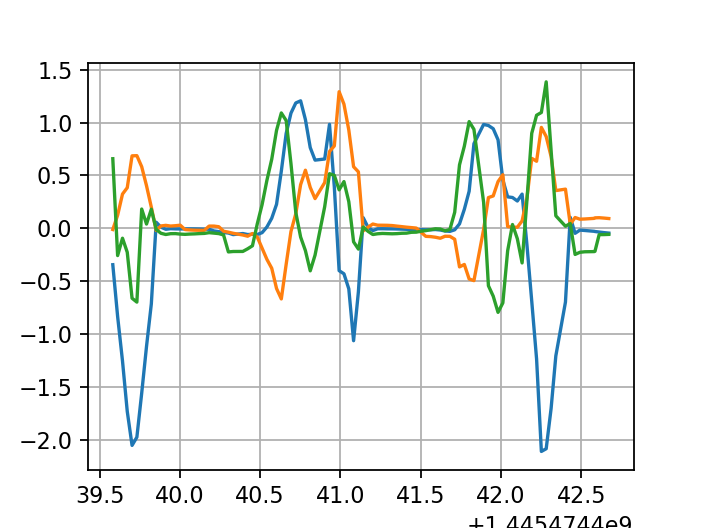

In [120]:
axis[0].zeroMean()
axis[1].zeroMean()
axis[2].zeroMean()

plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
[a.plot(200,300) for a in axis]
plt.show()

<IPython.core.display.Javascript object>


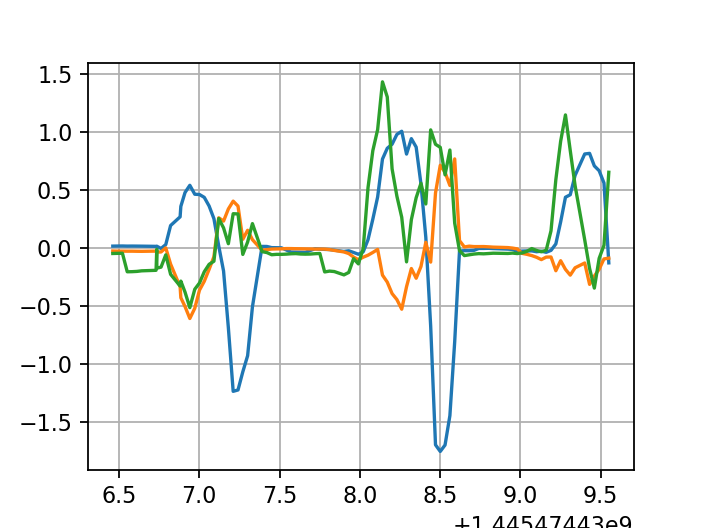

In [119]:
[a.lpfMA(5) for a in axis]
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
[a.plot(200,300) for a in axis]
plt.show()

<IPython.core.display.Javascript object>


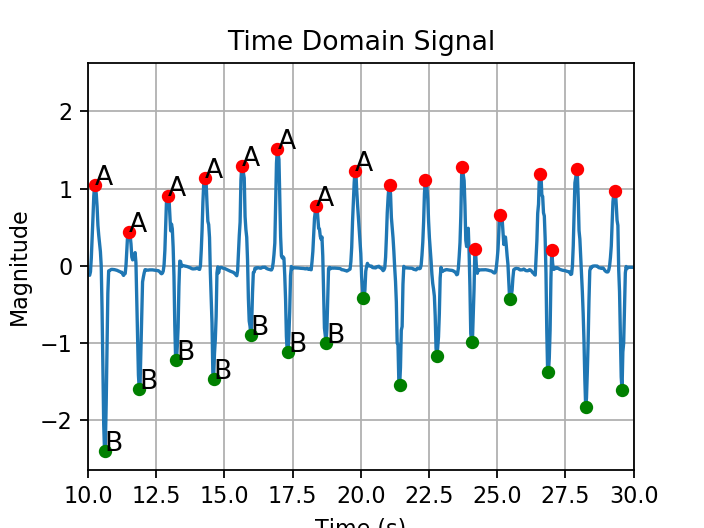

<function matplotlib.pyplot.show>

In [104]:
search_order = 5
peaks_idx = np.array(signal.argrelmax(axis_lpf[0], order=search_order))
valleys_idx = np.array(signal.argrelmin(axis_lpf[0], order=search_order))

peaks_t = ts_new[peaks_idx]
valleys_t = ts_new[valleys_idx]
peaks = axis_lpf[0][peaks_idx]
valleys = axis_lpf[0][valleys_idx]

peaks_filt = np.nonzero(np.logical_and(peaks > 0.2, peaks < 4))
valleys_filt = np.nonzero(np.logical_and(valleys < -0.2, valleys > -4))

peaks_idx = peaks_idx[peaks_filt]
valleys_idx = valleys_idx[valleys_filt]
peaks_t = ts_new[peaks_idx]
valleys_t = ts_new[valleys_idx]
peaks = axis_lpf[0][peaks_idx]
valleys = axis_lpf[0][valleys_idx]


plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.plot(ts_new, axis_lpf[0])
plt.plot(peaks_t, peaks, 'ro',ms=5)
plt.plot(valleys_t, valleys, 'go',ms=5)
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
#plt.title('Time Domain Signal (Axis ' + str(i + 1) + ')')
plt.title('Time Domain Signal')
for i in range(5,13):
    plt.text(peaks_t[i], peaks[i], "A", fontsize=12)

for i in range(5,12):
    plt.text(valleys_t[i], valleys[i], "B", fontsize=12)
    
plt.grid()
plt.xlim(10,30)
plt.show

In [25]:
class Motif:
    xs = []
    ys = []
    def __init__(self, xs, ys):
        self.xs = xs - min(xs)
        self.ys = ys
    def plot(self):
        plt.plot(self.xs, self.ys)

<IPython.core.display.Javascript object>


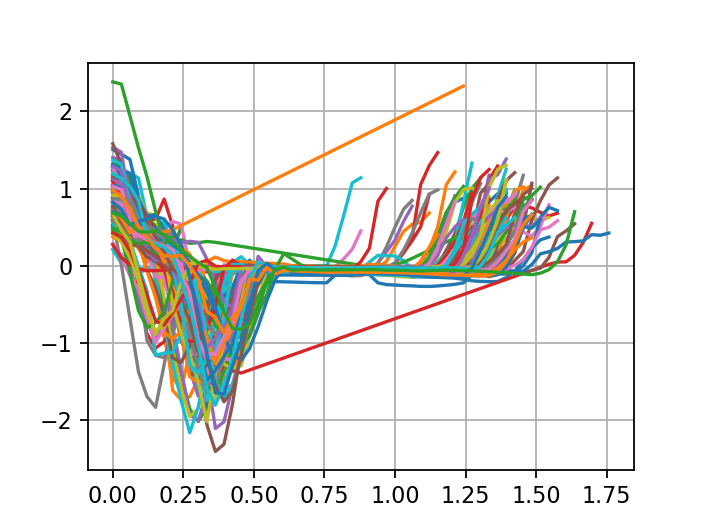

In [38]:
motifs = []
for i in range(len(peaks_idx)-1):
    motifs.append(Motif(ts_new[peaks_idx[i]:peaks_idx[i+1]], axis_lpf[0][peaks_idx[i]:peaks_idx[i+1]]))
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
plt.grid()
for i in range(len(motifs)):
    motifs[i].plot()
